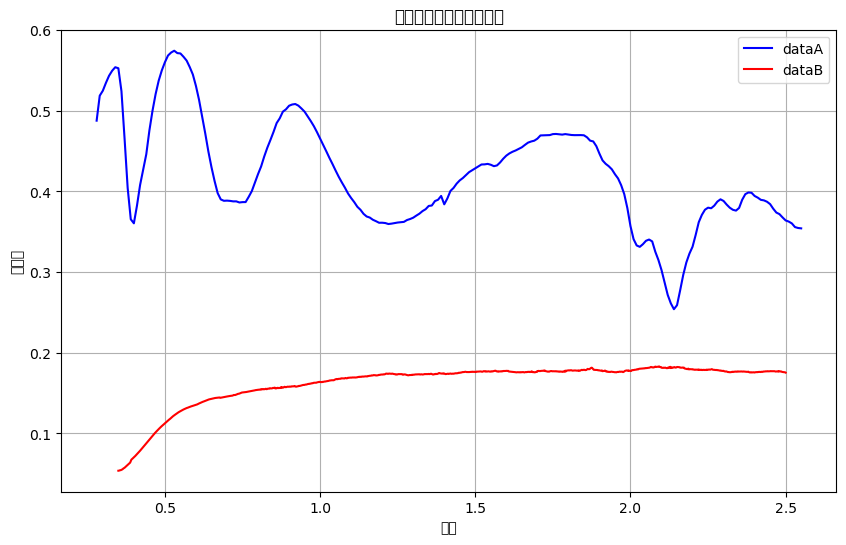

In [32]:
import csv

# CSVファイルを開く
csv_file = open('RelabDatabase2022Dec31/Library_Mineral_BD-VNIR.csv', 'r')

# CSVファイルを読み込むためのリーダーを作成
csv_reader = csv.reader(csv_file)

# 行を格納するリストを作成
targetA_row = 3  # 格納したい行の番号（0から始まるインデックス）
targetB_row = 4  # 格納したい行の番号（0から始まるインデックス）

dataA = []
dataB = []

# CSVファイルを1行ずつ読み込み、指定した行を取得
for row_index, row in enumerate(csv_reader):
    if row_index == targetA_row:
        dataA = row
        break
for row_index, row in enumerate(csv_reader):
    if row_index == targetB_row:
        dataB = row
        break
        
# CSVファイルを閉じる
csv_file.close()

# 取得した行を表示
# print(dataA)
# dataA = [float(x) for x in dataA]
band = int(float(dataA[2]))
dataA_wavelength = [float(x) for x in dataA[3:band+3]]
dataA_reflectance = [float(x) for x in dataA[band+3:band*2+3]]
band = int(float(dataB[2]))
dataB_wavelength = [float(x) for x in dataB[3:band+3]]
dataB_reflectance = [float(x) for x in dataB[band+3:band*2+3]]
# print(type(dataB_reflectance))
# print(dataA_wavelength)
# print(dataB_wavelength)

# 2つのリストを要素ごとに結合して2次元配列を作成
dataA = [[x, y] for x, y in zip(dataA_wavelength, dataA_reflectance)]
dataB = [[x, y] for x, y in zip(dataB_wavelength, dataB_reflectance)]
# print(dataA)
# print(dataB)

# # 対応する要素ごとの差分を計算
# differences = [a - b for a, b in zip(dataA_wavelength, dataB_wavelength)]
# print(differences)

import matplotlib.pyplot as plt
dataA = np.array(dataA)
dataB = np.array(dataB)
# プロット
plt.figure(figsize=(10, 6))  # グラフのサイズを設定

# dataAをプロット
plt.plot(dataA[:, 0], dataA[:, 1], label='dataA', color='blue')

# dataBをプロット
plt.plot(dataB[:, 0], dataB[:, 1], label='dataB', color='red')

# 軸ラベルと凡例を設定
plt.xlabel('波長')
plt.ylabel('反射率')
plt.legend()

# グラフを表示
plt.grid(True)  # グリッドを表示
plt.title('スペクトルデータの比較')  # グラフのタイトル
plt.show()

In [25]:
import numpy as np

# dataAとdataBの波長データと反射率データを用意
dataA = np.array(dataA)
dataB = np.array(dataB)

# 共通の波長範囲を見つける
min_wavelength = max(dataA[0, 0], dataB[0, 0])
max_wavelength = min(dataA[-1, 0], dataB[-1, 0])
print(min_wavelength)
print(max_wavelength)

# 共通の波長範囲での波長間隔を計算
wavelength_step = min(np.diff(dataA[:, 0]).min(), np.diff(dataB[:, 0]).min())
print(wavelength_step)

# 共通の波長範囲での波長データを作成
common_wavelength = np.arange(min_wavelength, max_wavelength, wavelength_step)
print(common_wavelength)

# 線形補間でdataAとdataBを共通の波長範囲に合わせる
interpolatedA = np.interp(common_wavelength, dataA[:, 0], dataA[:, 1])
interpolatedB = np.interp(common_wavelength, dataB[:, 0], dataB[:, 1])
# print(interpolatedA)

0.35
2.5
0.0019999999999997797
[0.35  0.352 0.354 ... 2.496 2.498 2.5  ]


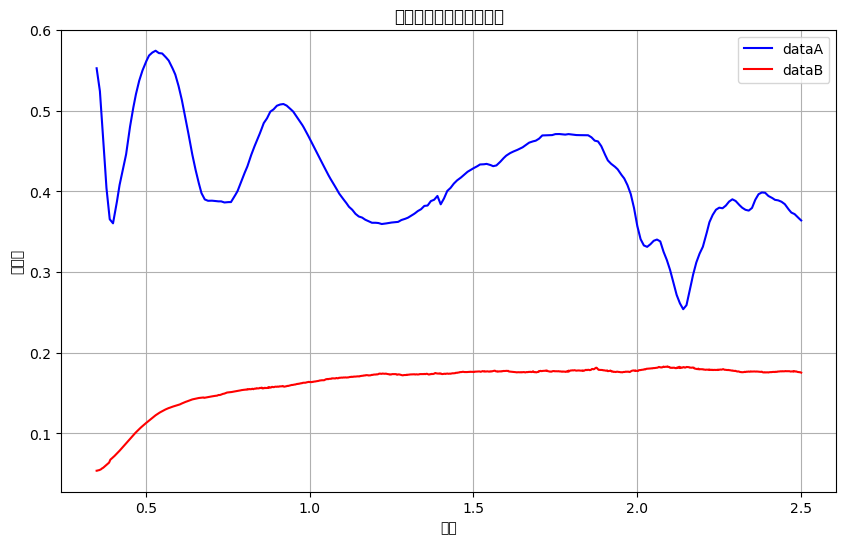

In [30]:
import matplotlib.pyplot as plt

# プロット
plt.figure(figsize=(10, 6))  # グラフのサイズを設定

# dataAをプロット
plt.plot(common_wavelength, interpolatedA, label='dataA', color='blue')

# dataBをプロット
plt.plot(common_wavelength, interpolatedB, label='dataB', color='red')

# 軸ラベルと凡例を設定
plt.xlabel('波長')
plt.ylabel('反射率')
plt.legend()

# グラフを表示
plt.grid(True)  # グリッドを表示
plt.title('スペクトルデータの比較')  # グラフのタイトル
plt.show()

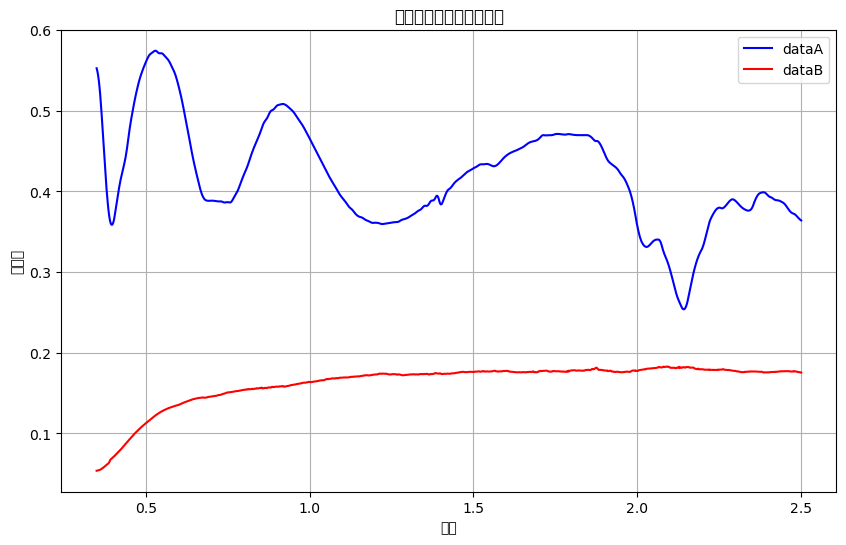

In [35]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# dataAとdataBの波長データと反射率データを用意
dataA = np.array(dataA)
dataB = np.array(dataB)

# dataAとdataBの波長範囲を求める
min_wavelength = max(min(dataA[:, 0]), min(dataB[:, 0]))
max_wavelength = min(max(dataA[:, 0]), max(dataB[:, 0]))

# 求めた波長範囲で新しい波長データを生成
new_wavelength = np.linspace(min_wavelength, max_wavelength, num=1000)  # 適切な数を選択

# 多項式補間を行う
interpolated_dataA = interp1d(dataA[:, 0], dataA[:, 1], kind='quadratic')
interpolated_dataB = interp1d(dataB[:, 0], dataB[:, 1], kind='quadratic')

# 補間後のデータを評価
interpolated_dataA_values = interpolated_dataA(new_wavelength)
interpolated_dataB_values = interpolated_dataB(new_wavelength)

# プロット
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.plot(new_wavelength, interpolated_dataA_values, label='dataA', color='blue')
plt.plot(new_wavelength, interpolated_dataB_values, label='dataB', color='red')

# 軸ラベルと凡例を設定
plt.xlabel('波長')
plt.ylabel('反射率')
plt.legend()

# グラフを表示
plt.grid(True)  # グリッドを表示
plt.title('スペクトルデータの比較')  # グラフのタイトル
plt.show()

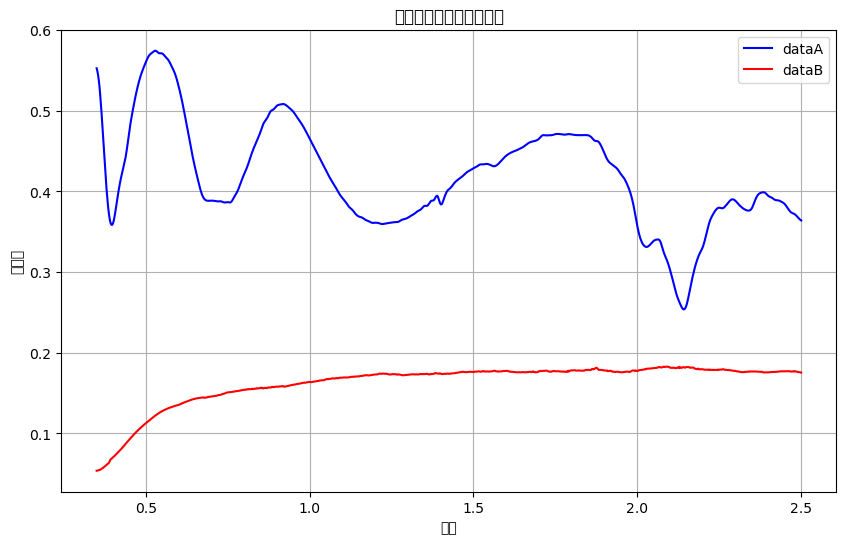

In [36]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# dataAとdataBの波長データと反射率データを用意
dataA = np.array(dataA)
dataB = np.array(dataB)

# dataAとdataBの波長範囲を求める
min_wavelength = max(min(dataA[:, 0]), min(dataB[:, 0]))
max_wavelength = min(max(dataA[:, 0]), max(dataB[:, 0]))

# 求めた波長範囲で新しい波長データを生成
new_wavelength = np.linspace(min_wavelength, max_wavelength, num=1000)  # 適切な数を選択

# 多項式補間を行う
interpolated_dataA = interp1d(dataA[:, 0], dataA[:, 1], kind='cubic')
interpolated_dataB = interp1d(dataB[:, 0], dataB[:, 1], kind='cubic')

# 補間後のデータを評価
interpolated_dataA_values = interpolated_dataA(new_wavelength)
interpolated_dataB_values = interpolated_dataB(new_wavelength)

# プロット
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.plot(new_wavelength, interpolated_dataA_values, label='dataA', color='blue')
plt.plot(new_wavelength, interpolated_dataB_values, label='dataB', color='red')

# 軸ラベルと凡例を設定
plt.xlabel('波長')
plt.ylabel('反射率')
plt.legend()

# グラフを表示
plt.grid(True)  # グリッドを表示
plt.title('スペクトルデータの比較')  # グラフのタイトル
plt.show()

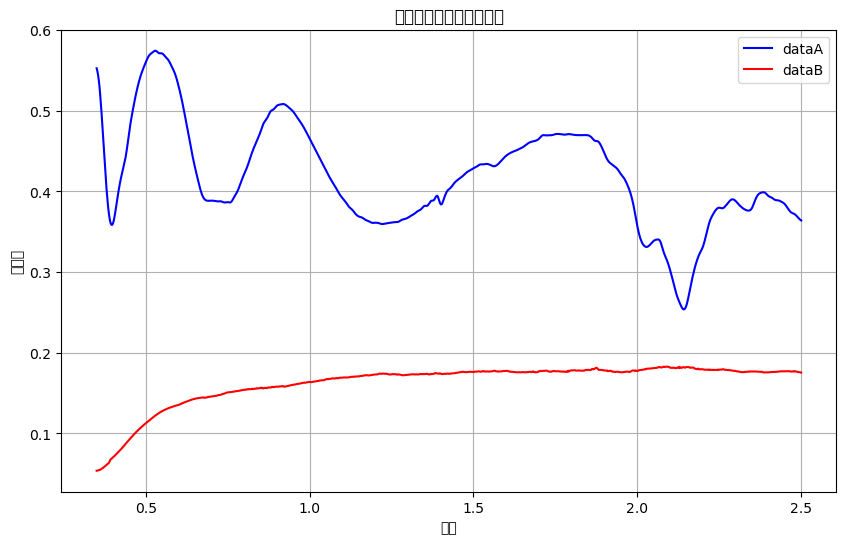

In [39]:
import numpy as np
from scipy.interpolate import CubicSpline

# dataAとdataBの波長データと反射率データを用意
dataA = np.array(dataA)
dataB = np.array(dataB)

# dataAとdataBの波長範囲を求める
min_wavelength = max(min(dataA[:, 0]), min(dataB[:, 0]))
max_wavelength = min(max(dataA[:, 0]), max(dataB[:, 0]))

# 共通の範囲で波長を生成
common_wavelength = np.linspace(min_wavelength, max_wavelength, num=1000)

# 三次スプライン補間を行う
csA = CubicSpline(dataA[:, 0], dataA[:, 1])
csB = CubicSpline(dataB[:, 0], dataB[:, 1])

# 補間曲線で共通の波長での反射率を取得
interpolated_A = csA(common_wavelength)
interpolated_B = csB(common_wavelength)

# プロット
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.plot(common_wavelength, interpolated_A, label='dataA', color='blue')
plt.plot(common_wavelength, interpolated_B, label='dataB', color='red')

# 軸ラベルと凡例を設定
plt.xlabel('波長')
plt.ylabel('反射率')
plt.legend()

# グラフを表示
plt.grid(True)  # グリッドを表示
plt.title('スペクトルデータの比較')  # グラフのタイトル
plt.show()

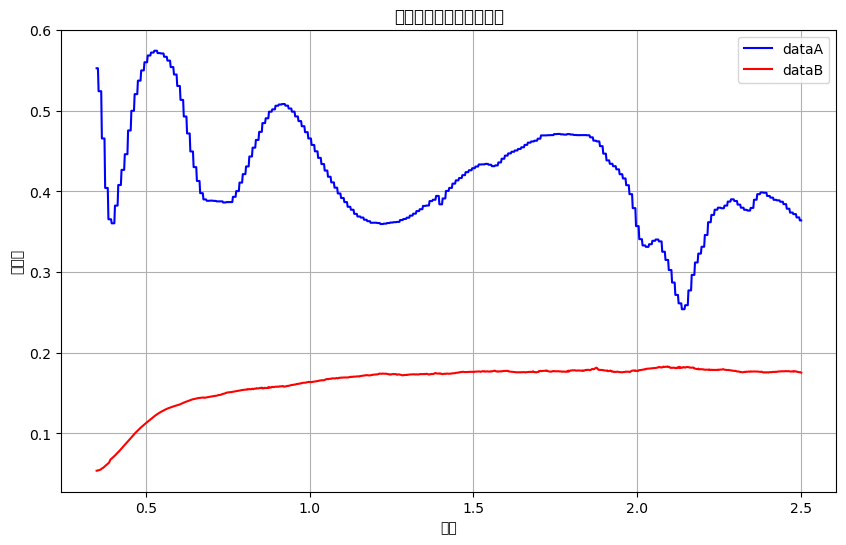

In [42]:
import numpy as np

# dataAとdataBの波長データと反射率データを用意
dataA = np.array(dataA)
dataB = np.array(dataB)

# dataAとdataBの波長範囲を求める
min_wavelength = max(min(dataA[:, 0]), min(dataB[:, 0]))
max_wavelength = min(max(dataA[:, 0]), max(dataB[:, 0]))

# 共通の波長範囲での波長間隔を計算
wavelength_step = min(np.diff(dataA[:, 0]).min(), np.diff(dataB[:, 0]).min())

# 共通の波長範囲での波長データを作成
common_wavelength = np.arange(min_wavelength, max_wavelength, wavelength_step)

# # 共通の波長範囲と間隔を決定
# common_wavelength = np.arange(min_wavelength, max_wavelength + 1, 1)

# dataAを最近傍補間して共通の波長での反射率を求める
interpolated_A = []
for wavelength in common_wavelength:
    nearest_index = np.argmin(np.abs(dataA[:, 0] - wavelength))
    interpolated_A.append(dataA[nearest_index, 1])

# dataBを最近傍補間して共通の波長での反射率を求める
interpolated_B = []
for wavelength in common_wavelength:
    nearest_index = np.argmin(np.abs(dataB[:, 0] - wavelength))
    interpolated_B.append(dataB[nearest_index, 1])

# # 最近傍補間されたデータを比較できます
# print("共通の波長:", common_wavelength)
# print("dataAの反射率:", interpolated_A)
# print("dataBの反射率:", interpolated_B)

# プロット
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.plot(common_wavelength, interpolated_A, label='dataA', color='blue')
plt.plot(common_wavelength, interpolated_B, label='dataB', color='red')

# 軸ラベルと凡例を設定
plt.xlabel('波長')
plt.ylabel('反射率')
plt.legend()

# グラフを表示
plt.grid(True)  # グリッドを表示
plt.title('スペクトルデータの比較')  # グラフのタイトル
plt.show()

In [51]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def read_mineral_library
csv_file = open('RelabDatabase2022Dec31/Library_Mineral_BD-VNIR.csv', 'r')
csv_reader = csv.reader(csv_file)

spectrumID_list = np.empty(0)
sampleID_list = np.empty(0)
data_all = []

# CSVファイルを1行ずつ読み込み、行を取得
for row_index, row_data in enumerate(csv_reader):
    spectrumID_list = np.append(spectrumID_list, row_data[0])
    sampleID_list = np.append(sampleID_list, row_data[1])
    band = int(float(row_data[2]))
    wavelength = [float(x) for x in row_data[3:band+3]]
    reflectance = [float(x) for x in row_data[band+3:band*2+3]]
    data = [[x, y] for x, y in zip(wavelength, reflectance)]
    data_all.append(data)

spectrumID_nda = np.insert(spectrumID_list, 0, 'target')
sampleID_nda = np.insert(sampleID_list, 0, 'target')
csv_file.close()


target_df = pd.read_csv('frt00003621_07_if166l_E_-97.71906 N_24.78909.csv')
target_nda = target_df.to_numpy()

for i in range(len(data_all)):
    data_nda = np.array(data_all[i])
    # 共通の波長範囲を見つける
    min_wavelength = max(data_nda[0, 0], target_nda[0, 0])
    max_wavelength = min(data_nda[-1, 0], target_nda[-1, 0])
    # 共通の波長範囲での波長間隔を計算
    wavelength_step = min(np.diff(data_nda[:, 0]).min(), np.diff(target_nda[:, 0]).min())
    # 共通の波長範囲での波長データを作成
    common_wavelength = np.arange(min_wavelength, max_wavelength, wavelength_step)
    # 線形補間でdataとtargetを共通の波長範囲に合わせる_nda_nda
    interpolated_data = np.interp(common_wavelength, data_nda[:, 0], data_nda[:, 1])
    interpolated_target = np.interp(common_wavelength, target_nda[:, 0], target_nda[:, 1])
    
    df = pd.DataFrame(interpolated_target)
    df[1] = interpolated_data
    # ピアソンの相関係数
    df = df.corr()
    
    if i == 0:
        df_all = df.copy()
    else:
        df_all = pd.concat([df_all, df.iloc[1:2]], axis=0)

df_all.insert(0, 'sampleID', sampleID_nda)
df_all.insert(1, 'spectrumID', spectrumID_nda)
index = range(len(data_all)+1)
df_all = df_all.set_axis(index, axis=0)
df_all = df_all.iloc[:,0:3]
df_all = df_all.rename(columns={0: 'result'})
print(df_all)

     sampleID  spectrumID    result
0      target      target  1.000000
1      c1aa01  aa-a1s-001  0.402599
2      c1aa02  aa-a1s-002  0.643000
3      c1aa03  aa-a1s-003  0.455196
4      c1aa04  aa-a1s-004  0.059080
...       ...         ...       ...
6355   c1ze31  ze-eac-031 -0.276977
6356   c1ze32  ze-eac-032 -0.294268
6357   c1ze57  ze-eac-057 -0.365441
6358   cazi01  zi-eac-001  0.158309
6359   cazi02  zi-eac-002  0.461485

[6360 rows x 3 columns]


In [96]:
!pip install tqdm
import tqdm

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


100%|██████████| 6359/6359 [00:02<00:00, 2897.75count/s]


### Library loading completed. ###


  2%|▏         | 135/6359 [00:00<00:04, 1344.55count/s]

          0         1
0  1.000000  0.402599
1  0.402599  1.000000
          0    1
1  0.402599  1.0
          0         1
0  1.000000  0.402599
1  0.402599  1.000000
1  0.643000  1.000000


100%|██████████| 6359/6359 [00:04<00:00, 1442.59count/s]


### Similarity measurement completed. ###

     sampleID  spectrumID       pcc  band  min wavelength  max wavelength
0      target      target  1.000000   437         1.00135         3.93682
1      c1aa01  aa-a1s-001  0.402599   237         1.00135         2.55000
2      c1aa02  aa-a1s-002  0.643000   237         1.00135         2.55000
3      c1aa03  aa-a1s-003  0.455196   237         1.00135         2.55000
4      c1aa04  aa-a1s-004  0.059080   237         1.00135         2.55000
...       ...         ...       ...   ...             ...             ...
6355   c1ze31  ze-eac-031 -0.276977   320         1.00135         2.60000
6356   c1ze32  ze-eac-032 -0.294268   320         1.00135         2.60000
6357   c1ze57  ze-eac-057 -0.365441   320         1.00135         2.60000
6358   cazi01  zi-eac-001  0.158309   320         1.00135         2.60000
6359   cazi02  zi-eac-002  0.461485   320         1.00135         2.60000

[6360 rows x 6 columns]
     sampleID    spectrumID       pcc  band 

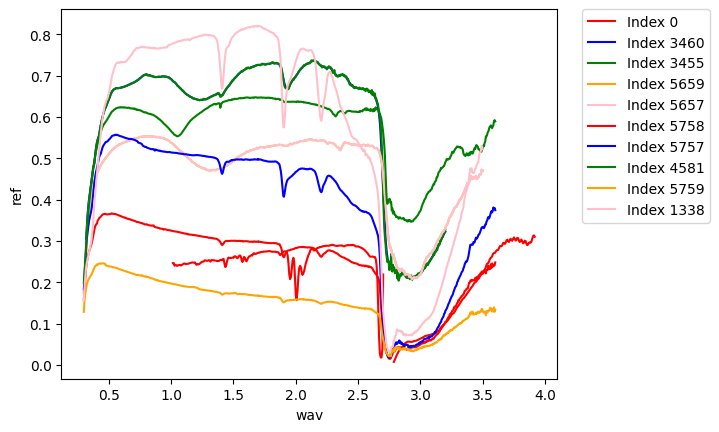

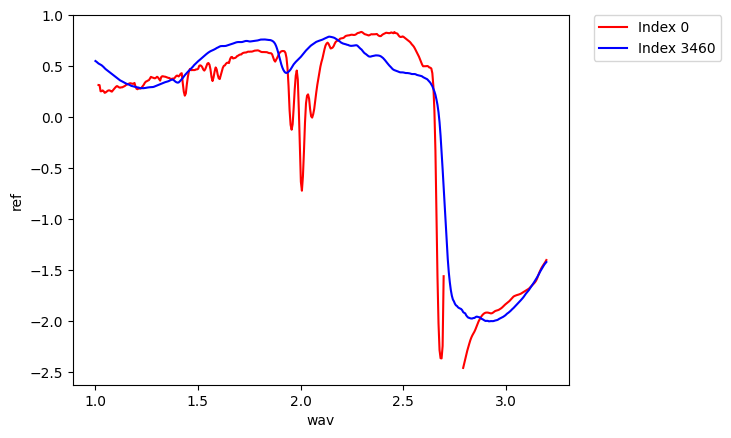

In [146]:
# ピアソンの相関係数、比較
# %matplotlib inline

from tqdm import tqdm 
import csv
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class SpectrumComparison:
    def __init__(self, library_file_path, target_file_path):
        self.library_file_path = library_file_path
        self.target_file_path = target_file_path
        self.load_library()
        self.load_target()

    def load_library(self):
        csv_file = open(self.library_file_path, 'r')
        csv_reader = csv.reader(csv_file)
        rows = list(csv_reader)
        row_count = len(rows)
        spectrumID_list, sampleID_list, library_spectra = [], [], []

        progress_tqdm = tqdm(total=row_count, unit='count')
        
        # for row_index, row_data in tqdm(enumerate(rows)):
        for row_index, row_data in enumerate(rows):
            spectrumID_list = np.append(spectrumID_list, row_data[0])
            sampleID_list = np.append(sampleID_list, row_data[1])
            band = int(float(row_data[2]))
            wavelength = [float(x) for x in row_data[3:band + 3]]
            reflectance = [float(x) for x in row_data[band + 3:band * 2 + 3]]
            data = [[x, y] for x, y in zip(wavelength, reflectance)]
            library_spectra.append(data)

            progress_tqdm.update(1)
        
        self.spectrumID_list = spectrumID_list
        self.sampleID_list = sampleID_list
        self.library_spectra = library_spectra
        csv_file.close()

        progress_tqdm.close()
        print('### Library loading completed. ###')

    def load_target(self):
        target_df = pd.read_csv(self.target_file_path)
        self.target_nda = target_df.to_numpy()

    def join_data(self):
        self.spectrumID_list = np.insert(self.spectrumID_list, 0, 'target')
        self.sampleID_list = np.insert(self.sampleID_list, 0, 'target')
        self.spectra_all = self.library_spectra.copy()
        self.spectra_all.insert(0, self.target_nda.tolist())

    @classmethod
    def cos_sim(self, df):
        df_nonan = df.dropna(how='any')
        if df_nonan.empty:
            # 波長域が被っていない場合
            return np.nan
        return np.dot(df_nonan[0], df_nonan[1]) / (np.linalg.norm(df_nonan[0]) * np.linalg.norm(df_nonan[1]))

    @classmethod
    def euclid_dis(self, df):
        df_nonan = df.dropna(how='any')
        if df_nonan.empty:
            return np.nan
        return np.linalg.norm(df_nonan[0] - df_nonan[1])

    @classmethod
    def normalization(self,ref_nda):
        if ref_nda.size == 0:
            return ref_nda
        result = (ref_nda - np.nanmin(ref_nda)) / (np.nanmax(ref_nda) - np.nanmin(ref_nda))
        return result

    @classmethod
    def standardization(self,ref_nda):
        if ref_nda.size == 0:
            return ref_nda
        result = (ref_nda - np.nanmean(ref_nda)) / np.nanstd(ref_nda)
        return result

    def measure_similarity(self, measure_type):
        self.normalized_arr = [None for k in range(len(self.library_spectra)+1)]
        wav_list = np.empty(len(self.library_spectra)+1)
        min_wav_list = np.empty(len(self.library_spectra)+1)
        max_wav_list = np.empty(len(self.library_spectra)+1)
        self.normalized_arr[0] = None
        wav_list[0] = len(self.target_nda)
        min_wav_list[0] = self.target_nda[0][0]
        max_wav_list[0] = self.target_nda[-1][0]

        progress_tqdm = tqdm(total=len(self.library_spectra), unit='count')

        # for i in tqdm(range(len(self.library_spectra))):
        for i in range(len(self.library_spectra)):
            data_nda = np.array(self.library_spectra[i])
            min_wavelength = max(data_nda[0, 0], self.target_nda[0, 0])
            max_wavelength = min(data_nda[-1, 0], self.target_nda[-1, 0])
            wavelength_step = min(np.diff(data_nda[:, 0]).min(), np.diff(self.target_nda[:, 0]).min())
            common_wavelength = np.arange(min_wavelength, max_wavelength, wavelength_step)
            interpolated_data = np.interp(common_wavelength, data_nda[:, 0], data_nda[:, 1])
            interpolated_target = np.interp(common_wavelength, self.target_nda[:, 0], self.target_nda[:, 1])
            df = pd.DataFrame({0:interpolated_target, 1:interpolated_data})

            # Normalization
            # normed_target = self.normalization(interpolated_target)
            # normed_data = self.normalization(interpolated_data)
            # df = pd.DataFrame({0:normed_target, 1:normed_data})

            # Standardization
            normed_target = self.standardization(interpolated_target)
            normed_data = self.standardization(interpolated_data)
            df = pd.DataFrame({0:normed_target, 1:normed_data})

            # similarity
            if measure_type == 'cos':
                df = pd.DataFrame([[1.0], [self.cos_sim(df)]])
            elif measure_type == 'pcc':            
                df = df.corr()
                if i == 0:
                    print(df)
                    print(df.iloc[1:2])
            elif measure_type == 'edis':
                df = pd.DataFrame([[0.0], [self.euclid_dis(df)]])
            
            if i == 0:
                df_all = df.copy()
            else:
                df_all = pd.concat([df_all, df.iloc[1:2]], axis=0)
                if i == 1:
                    print(df_all)
                    # print(df.iloc[1:2])

            self.normalized_arr[i+1] = [common_wavelength, normed_target, normed_data]
            min_wav_list[i+1] = min_wavelength
            max_wav_list[i+1] = max_wavelength
            wav_list[i+1] = len(common_wavelength)

            progress_tqdm.update(1)

        self.join_data()
        index = range(len(self.spectra_all))
        df_all.insert(0, 'sampleID', self.sampleID_list)
        df_all.insert(1, 'spectrumID', self.spectrumID_list)
        df_all.insert(3, 'band', wav_list)
        df_all.insert(4, 'min wavelength', min_wav_list)
        df_all.insert(5, 'max wavelength', max_wav_list)
        df_all['band'] = df_all['band'].astype('int')
        df_all = df_all.set_axis(index, axis=0)
        df_all = df_all.iloc[:, 0:6]
        df_all = df_all.rename(columns={0: measure_type})

        progress_tqdm.close()
        print('### Similarity measurement completed. ###\n')

        return df_all
    
    def plot(self, index, sp_type):
        colors = ['red', 'blue', 'green', 'orange', 'pink']

        if sp_type == 'raw':
            for i, index in enumerate(index_list):
                spectrum = self.spectra_all[index]
                plt.plot([row[0] for row in self.spectra_all[index]], [row[1] for row in self.spectra_all[index]], color=colors[i%5], label=f'Index {index}')
        elif sp_type == 'norm':
            if index == 0:
                return print('Please specify a index other than 0.')
            # print(len(index))
            # if len(index) > 1:
            #     return print('Please specify one index.')

            plt.plot(self.normalized_arr[index][0], self.normalized_arr[index][1], color=colors[0], label=f'Index {0}')
            plt.plot(self.normalized_arr[index][0], self.normalized_arr[index][2], color=colors[1], label=f'Index {index}')

        plt.xlabel('wav')
        plt.ylabel('ref')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) 
        plt.show()

if __name__ == "__main__":
    library_file_path = 'RelabDatabase2022Dec31/Library_Mineral_BD-VNIR.csv'
    target_file_path = 'frt00003621_07_if166l_E_-97.71906 N_24.78909.csv'
    
    comparer = SpectrumComparison(library_file_path, target_file_path)
    # comparer.load_library()
    # comparer.load_target()
    result = comparer.measure_similarity('pcc')
    print(result)

    # 比較しているband数を条件適用し抽出
    result = result[result['band'] > 200]
    # ソート
    sorted_df = result.sort_values(by=['pcc'], ascending=False)
    print(sorted_df)

    # 指定した上位の数分プロットする (nlargest:大きい方から、nsmallest:小さい方から)
    index_list = sorted_df.nlargest(10, 'pcc').index
    # index_list = sorted_df.nsmallest(10, 'pcc').index
    comparer.plot(index_list, 'raw')
    comparer.plot(3460, 'norm')
